In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline    
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std

# **Datasets Reading** 

In [2]:
# x_train = pd.read_csv('../Datasets/X_Train Without Yeo Johnson 70-30.csv')

# x_test = pd.read_csv('../Datasets/X_Test Without Yeo Johnson 70-30.csv')

# y_train = pd.read_csv('../Datasets/Y_Train Without Yeo Johnson 70-30.csv')

# y_test = pd.read_csv('../Datasets/Y_Test Without Yeo Johnson  70-30.csv')

In [3]:
x_train = pd.read_csv('../Updated Datasets/Update X_Train Without Yeo Johnson 70-30.csv')

x_test = pd.read_csv('../Updated Datasets/Update X_Test Without Yeo Johnson 70-30.csv')

y_train = pd.read_csv('../Updated Datasets/Update Y_Train Without Yeo Johnson 70-30.csv')

y_test = pd.read_csv('../Updated Datasets/Update Y_Test Without Yeo Johnson 70-30.csv')

In [4]:
x_train

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0.896617,0.032034,-0.054052,-0.128564,-0.720501,-0.816991,-0.855640,-0.480919,-0.473748,-0.451293,-1.114137
1,0.896617,-1.966008,2.181869,1.504902,0.461613,0.264700,-0.855640,1.386073,1.596949,-0.141839,-1.114137
2,0.896617,0.531544,-0.721925,-0.496462,-0.072245,-0.044354,-0.769694,0.219203,0.250996,-0.451293,0.657481
3,-1.115304,1.930174,2.559363,2.358425,1.376799,0.496491,1.464903,0.452577,-0.266678,0.291397,1.004102
4,0.896617,0.431642,-0.402507,0.106890,2.406382,3.119648,-0.769694,0.919325,-0.163143,0.477069,1.774371
...,...,...,...,...,...,...,...,...,...,...,...
179,-1.115304,0.032034,0.178251,0.077458,-1.101829,-0.121618,-0.769694,1.386073,1.596949,-0.018057,-0.921570
180,-1.115304,-0.567379,-0.489621,-0.746633,-0.987430,0.496491,-0.254017,-0.714293,1.079275,-0.203730,-0.343869
181,0.896617,0.831251,3.582000,4.342622,0.842941,1.500918,0.691389,-0.247545,1.804019,0.043833,1.196669
182,-1.115304,0.531544,0.265365,1.254732,0.042153,-0.507936,0.175713,-0.480919,-0.577283,-0.141839,1.196669


In [5]:
print(y_train['Class'].value_counts())

2    91
0    64
1    29
Name: Class, dtype: int64


# Information Gain using Mutual info classifier

In [6]:
# from sklearn.feature_selection import mutual_info_classif

# importances = mutual_info_classif(x_train, y_train)

# feat_importances = pd.Series(importances)
# feat_importances.index = x_train.columns
# feat_importances.sort_values(ascending=True)
# #feat_importances.plot(kind='barh', color = 'teal')
# #plt.show()
# feat_importances.nlargest(11).plot(kind='barh', color = 'teal')

In [7]:
# IG_Top_4_X = x_train[['HbA1c', 'BMI', 'AGE', 'Chol']]
# IG_Top_5_X = x_train[['HbA1c', 'BMI', 'AGE', 'Chol', 'TG']]
# IG_Top_7_X = x_train[['HbA1c', 'BMI', 'AGE', 'Chol', 'TG', 'Urea', 'Cr']]
# IG_Top_9_X = x_train[['HbA1c', 'BMI', 'AGE', 'Chol', 'TG', 'Urea', 'Cr', 'HDL', 'VLDL']]
# IG_Top_11_X = x_train[['HbA1c', 'BMI', 'AGE', 'Chol', 'TG', 'Urea', 'Cr', 'HDL', 'VLDL', 'Gender', 'LDL']]
# x_train = IG_Top_4_X

In [8]:
# IG_Top_4_X = x_test[['HbA1c', 'BMI', 'AGE', 'Chol']]
# IG_Top_5_X = x_test[['HbA1c', 'BMI', 'AGE', 'Chol', 'TG']]
# IG_Top_7_X = x_test[['HbA1c', 'BMI', 'AGE', 'Chol', 'TG', 'Urea', 'Cr']]
# IG_Top_9_X = x_test[['HbA1c', 'BMI', 'AGE', 'Chol', 'TG', 'Urea', 'Cr', 'HDL', 'VLDL']]
# IG_Top_11_X = x_test[['HbA1c', 'BMI', 'AGE', 'Chol', 'TG', 'Urea', 'Cr', 'HDL', 'VLDL', 'Gender', 'LDL']]
# x_test = IG_Top_4_X

In [9]:
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict = {}
performance_dict['Metrics'] = metrics

In [10]:
metrics_grid = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict_grid = {}
performance_dict_grid['Metrics'] = metrics_grid

# SMOTETomek Balancing

In [11]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_train)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_train_smt, y_train_smt = smtt.fit_resample(x_train, y_train)
# counter = Counter(y_train_smt)
# print('After', counter)


In [12]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_test)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_test_smt, y_test_smt = smtt.fit_resample(x_test, y_test)
# counter = Counter(y_test_smt)
# print('After', counter)


# Support Vector Classifier Train, Test 

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC(probability=True)
modelSVC.fit(x_train, y_train)
#modelSVC.fit(x_test, y_test)
#print(modelSVC.score(x_test, y_test))

y_pred_svc = modelSVC.predict(x_test)
#y_pred = modelSVC.predict(x_train)
svc_acc = accuracy_score(y_test, y_pred_svc)
#ac = accuracy_score(y_train, y_pred)
print(svc_acc)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.9
[[31  0  1]
 [ 2  7  2]
 [ 1  2 34]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        32
           1       0.78      0.64      0.70        11
           2       0.92      0.92      0.92        37

    accuracy                           0.90        80
   macro avg       0.87      0.84      0.85        80
weighted avg       0.90      0.90      0.90        80



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, modelSVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



Y_pred_svc = modelSVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_svc)
f1 = f1_score(y_test, Y_pred_svc, average = "weighted")
precision = precision_score(y_test, Y_pred_svc, average = "weighted")
recall = recall_score(y_test, Y_pred_svc, average = "weighted")

pred_prob = modelSVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.8966503267973855
f1 Score  0.8970075757575758
Recall  0.9
Specificity/TNR: 1.0
Cohen Kappa: 0.8335067637877211
AUC Score  0.977607622839944


In [15]:
svc_performances = [svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict['SVC'] = svc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9,
  0.8966503267973855,
  0.9,
  0.8970075757575758,
  0.8335067637877211,
  0.977607622839944]}

# Supper Vector Classifier Hyperparameter Tuning GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV
GSCV_SVC = GridSearchCV(modelSVC,{
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf', 'linear', 'poly', 'sigmoid']
}, 
cv = 10, 
return_train_score = False
)
GSCV_SVC.fit(x_train, y_train)
GSCV_SVC.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.01946926, 0.00932832, 0.00926776, 0.0096247 , 0.01842105,
        0.01766493, 0.01475651, 0.01513667, 0.02115748, 0.01602652,
        0.01355431, 0.01766789, 0.02048945, 0.02367718, 0.01372421,
        0.0168541 , 0.02075918, 0.01518035, 0.01483061, 0.01655209,
        0.02693295, 0.01513562, 0.01472373, 0.01222677, 0.01698301,
        0.0150176 , 0.01271422, 0.01067076, 0.01401765, 0.01496637,
        0.01237259, 0.01608458, 0.02528651, 0.02181516, 0.01700327,
        0.02004478, 0.02216439, 0.01828446, 0.01453197, 0.01970692,
        0.03213735, 0.02051229, 0.01506402, 0.01257157, 0.01750112,
        0.01805778, 0.01433339, 0.01114464, 0.01689696, 0.01918364,
        0.01319053, 0.01236265, 0.01782596, 0.019473  , 0.01357143,
        0.01780663, 0.02061992, 0.0185318 , 0.01394467, 0.01660216,
        0.03008604, 0.02025716, 0.01594403, 0.01321175, 0.01955109,
        0.02535315, 0.01651616, 0.01225615, 0.01614847, 0.02247484,
        0.01366878, 0.01228285,

In [17]:
df_svc_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_svc_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019469,0.003211,0.002191,0.000401,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.736842,0.631579,...,0.631579,0.666667,0.555556,0.777778,0.722222,0.666667,0.666667,0.673977,0.059108,306
1,0.009328,0.002150,0.001895,0.000537,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.947368,0.842105,...,0.842105,0.777778,0.833333,0.888889,0.888889,0.944444,0.833333,0.869298,0.050595,92
2,0.009268,0.001676,0.001967,0.000569,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.894737,0.842105,...,0.842105,0.777778,0.722222,0.888889,0.666667,0.833333,0.722222,0.803216,0.073194,204
3,0.009625,0.000948,0.001793,0.000598,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.631579,0.684211,...,0.789474,0.777778,0.833333,0.722222,0.611111,0.722222,0.722222,0.723099,0.064937,267
4,0.018421,0.005937,0.003278,0.001193,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.842105,0.736842,...,0.894737,0.777778,0.722222,0.888889,0.666667,0.777778,0.833333,0.803509,0.075773,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.015084,0.001905,0.002737,0.000886,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.789474,0.789474,...,0.842105,0.833333,0.833333,0.777778,0.777778,0.777778,0.777778,0.804094,0.027924,181
396,0.022882,0.003944,0.003298,0.000906,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.789474,0.789474,...,0.789474,0.833333,0.777778,0.777778,0.777778,0.777778,0.777778,0.793275,0.022876,253
397,0.046791,0.009950,0.002975,0.001235,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",0.894737,0.842105,...,0.842105,0.833333,0.888889,0.888889,0.888889,0.944444,0.888889,0.880702,0.031541,61
398,0.014445,0.002560,0.003493,0.000912,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.473684,0.473684,...,0.473684,0.555556,0.500000,0.500000,0.500000,0.500000,0.500000,0.495029,0.023684,316


In [18]:
df_svc_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.673977
1,1,linear,0.869298
2,1,poly,0.803216
3,1,sigmoid,0.723099
4,1,rbf,0.803509
...,...,...,...
395,20,sigmoid,0.804094
396,20,rbf,0.793275
397,20,linear,0.880702
398,20,poly,0.495029


In [19]:
print(GSCV_SVC.best_score_)
gscv_svc_acc = GSCV_SVC.best_score_
print(GSCV_SVC.best_params_)

0.891812865497076
{'C': 16, 'gamma': 1, 'kernel': 'linear'}


In [20]:
grid_predictions = GSCV_SVC.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.77      0.91      0.83        11
           2       0.94      0.89      0.92        37

    accuracy                           0.93        80
   macro avg       0.89      0.92      0.91        80
weighted avg       0.93      0.93      0.93        80



In [21]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, GSCV_SVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



y_pred_svc_grid = GSCV_SVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, y_pred_svc_grid)
f1 = f1_score(y_test, y_pred_svc_grid, average = "weighted")
precision = precision_score(y_test, y_pred_svc_grid, average = "weighted")
recall = recall_score(y_test, y_pred_svc_grid, average = "weighted")

pred_prob = GSCV_SVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9293406593406595
f1 Score  0.9260416666666668
Recall  0.925
Specificity/TNR: 1.0
Cohen Kappa: 0.8781107160995429
AUC Score  0.981748681929183


In [22]:
svc_performances_grid = [gscv_svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['SVC'] = svc_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.891812865497076,
  0.9293406593406595,
  0.925,
  0.9260416666666668,
  0.8781107160995429,
  0.981748681929183]}

# Logistic Regression Train, Test

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

y_pred_lr = modelLR.predict(x_test)
lr_ac = accuracy_score(y_test, y_pred_lr)

print("Training Accuracy: {:.3f}".format(modelLR.score(x_train, y_train)))
print("Testing Accuracy: {:.3f}".format(modelLR.score(x_test, y_test)))

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Training Accuracy: 0.886
Testing Accuracy: 0.925
[[30  1  1]
 [ 0 10  1]
 [ 0  3 34]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.71      0.91      0.80        11
           2       0.94      0.92      0.93        37

    accuracy                           0.93        80
   macro avg       0.89      0.92      0.90        80
weighted avg       0.94      0.93      0.93        80



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, modelLR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr = modelLR.predict(x_test)
pred_prob = modelLR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr)
f1 = f1_score(y_test, Y_pred_lr, average = "weighted")
precision = precision_score(y_test, Y_pred_lr, average = "weighted")
recall = recall_score(y_test, Y_pred_lr, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9350198412698413
f1 Score  0.9279186920017676
Recall  0.925
Specificity/TNR: 0.967741935483871
Cohen Kappa: 0.8786039453717754
AUC Score  0.9637349640450154


In [25]:
rfc_performances = [lr_ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['LR'] = rfc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9,
  0.8966503267973855,
  0.9,
  0.8970075757575758,
  0.8335067637877211,
  0.977607622839944],
 'LR': [0.925,
  0.9350198412698413,
  0.925,
  0.9279186920017676,
  0.8786039453717754,
  0.9637349640450154]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [26]:
from sklearn import linear_model

C = np.logspace(0, 4, 10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
logistic = linear_model.LogisticRegression()
GSCV_LR = GridSearchCV(logistic, hyperparameters, cv = 10)
GSCV_LR.fit(x_train, y_train)
GSCV_LR.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.0058867 , 0.02701647, 0.00542181, 0.02006316, 0.0069128 ,
        0.02445536, 0.00623491, 0.02147822, 0.00747356, 0.02749877,
        0.0064909 , 0.02046113, 0.00723162, 0.02654057, 0.00634074,
        0.01827791, 0.00791869, 0.02517614, 0.00608308, 0.01843326,
        0.00757089, 0.02642796, 0.00590425, 0.01933415, 0.00863919,
        0.02875612, 0.00616837, 0.01994135, 0.00917618, 0.02752445,
        0.0067987 , 0.01878512, 0.00885623, 0.03082218, 0.00569568,
        0.02130384, 0.00833721, 0.02877228, 0.00619843, 0.01902936]),
 'std_fit_time': array([0.00070848, 0.00337988, 0.00075053, 0.00312548, 0.00080006,
        0.00405868, 0.00118285, 0.00316093, 0.00111198, 0.00282634,
        0.00101574, 0.00212096, 0.00127906, 0.00346807, 0.00096061,
        0.00312104, 0.00194232, 0.00325192, 0.0006973 , 0.00234371,
        0.00112881, 0.00584262, 0.00084952, 0.00141788, 0.00099755,
        0.00373006, 0.00088266, 0.00322059, 0.00125014, 0.00368687,
        0.000

In [27]:
df_lr_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019469,0.003211,0.002191,0.000401,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.736842,0.631579,...,0.631579,0.666667,0.555556,0.777778,0.722222,0.666667,0.666667,0.673977,0.059108,306
1,0.009328,0.002150,0.001895,0.000537,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.947368,0.842105,...,0.842105,0.777778,0.833333,0.888889,0.888889,0.944444,0.833333,0.869298,0.050595,92
2,0.009268,0.001676,0.001967,0.000569,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.894737,0.842105,...,0.842105,0.777778,0.722222,0.888889,0.666667,0.833333,0.722222,0.803216,0.073194,204
3,0.009625,0.000948,0.001793,0.000598,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.631579,0.684211,...,0.789474,0.777778,0.833333,0.722222,0.611111,0.722222,0.722222,0.723099,0.064937,267
4,0.018421,0.005937,0.003278,0.001193,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.842105,0.736842,...,0.894737,0.777778,0.722222,0.888889,0.666667,0.777778,0.833333,0.803509,0.075773,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.015084,0.001905,0.002737,0.000886,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.789474,0.789474,...,0.842105,0.833333,0.833333,0.777778,0.777778,0.777778,0.777778,0.804094,0.027924,181
396,0.022882,0.003944,0.003298,0.000906,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.789474,0.789474,...,0.789474,0.833333,0.777778,0.777778,0.777778,0.777778,0.777778,0.793275,0.022876,253
397,0.046791,0.009950,0.002975,0.001235,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",0.894737,0.842105,...,0.842105,0.833333,0.888889,0.888889,0.888889,0.944444,0.888889,0.880702,0.031541,61
398,0.014445,0.002560,0.003493,0.000912,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.473684,0.473684,...,0.473684,0.555556,0.500000,0.500000,0.500000,0.500000,0.500000,0.495029,0.023684,316


In [28]:
df_lr_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.673977
1,1,linear,0.869298
2,1,poly,0.803216
3,1,sigmoid,0.723099
4,1,rbf,0.803509
...,...,...,...
395,20,sigmoid,0.804094
396,20,rbf,0.793275
397,20,linear,0.880702
398,20,poly,0.495029


In [29]:
print(GSCV_LR.best_score_)
gscv_lr_acc = GSCV_LR.best_score_
print(GSCV_LR.best_params_)

0.8739766081871346
{'C': 2.7825594022071245, 'penalty': 'l1', 'solver': 'saga'}


In [30]:
grid_predictions = GSCV_LR.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.71      0.91      0.80        11
           2       0.94      0.92      0.93        37

    accuracy                           0.93        80
   macro avg       0.89      0.92      0.90        80
weighted avg       0.94      0.93      0.93        80



In [31]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_LR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr_grid = GSCV_LR.predict(x_test)
pred_prob = GSCV_LR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr_grid)
f1 = f1_score(y_test, Y_pred_lr_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_lr_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_lr_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9350198412698413
f1 Score  0.9279186920017676
Recall  0.925
Specificity/TNR: 0.967741935483871
Cohen Kappa: 0.8786039453717754
AUC Score  0.9721449427355013


In [32]:
lr_performances_grid = [gscv_lr_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['LR'] = lr_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.891812865497076,
  0.9293406593406595,
  0.925,
  0.9260416666666668,
  0.8781107160995429,
  0.981748681929183],
 'LR': [0.8739766081871346,
  0.9350198412698413,
  0.925,
  0.9279186920017676,
  0.8786039453717754,
  0.9721449427355013]}

# KNN Train, Test

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


modelKNN = KNeighborsClassifier() #, algorithm = 'ball_tree', weights = 'distance', metric = 'minkowski', p = 2
modelKNN.fit(x_train, y_train)
print(modelKNN.score(x_test, y_test))

# Predicting the Test set results
y_pred_knn = modelKNN.predict(x_test)
ac = accuracy_score(y_test, y_pred_knn)
print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.7875
0.7875
[[28  3  1]
 [ 4  5  2]
 [ 5  2 30]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.81        32
           1       0.50      0.45      0.48        11
           2       0.91      0.81      0.86        37

    accuracy                           0.79        80
   macro avg       0.72      0.71      0.71        80
weighted avg       0.79      0.79      0.79        80



C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

In [34]:
from sklearn.metrics import cohen_kappa_score
cmKNN = confusion_matrix(y_test, modelKNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmKNN[1,1]  
TN = cmKNN[0,0] 
FP = cmKNN[0,1] 
FN = cmKNN[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalKNN = sum(sum(cmKNN))
Accuracy = (TN+TP)/totalKNN
# MCC
val = (TP * TN) - (FP * FN)
MCC_KNN = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn = modelKNN.predict(x_test)
pred_prob = modelKNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn)
f1 = f1_score(y_test, Y_pred_knn, average = "weighted")
precision = precision_score(y_test, Y_pred_knn, average = "weighted")
recall = recall_score(y_test, Y_pred_knn, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")


Precision  0.7919072481572481
f1 Score  0.7865424430641822
Recall  0.7875
Specificity/TNR: 0.9032258064516129
Cohen Kappa: 0.6499356499356499
AUC Score  0.8985683524368829


C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [35]:
# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
knn_performances = [ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['KNN'] = knn_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9,
  0.8966503267973855,
  0.9,
  0.8970075757575758,
  0.8335067637877211,
  0.977607622839944],
 'LR': [0.925,
  0.9350198412698413,
  0.925,
  0.9279186920017676,
  0.8786039453717754,
  0.9637349640450154],
 'KNN': [0.7875,
  0.7919072481572481,
  0.7875,
  0.7865424430641822,
  0.6499356499356499,
  0.8985683524368829]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [36]:
grid_params = { 'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

GSCV_KNN = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 10, n_jobs = -1)
GSCV_KNN.fit(x_train, y_train)
GSCV_KNN.cv_results_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'mean_fit_time': array([0.01017408, 0.0087559 , 0.0111053 , 0.01044915, 0.00674644,
        0.00800552, 0.01092963, 0.00760498, 0.0108072 , 0.01008153,
        0.00999765, 0.0120929 , 0.01017892, 0.01565228, 0.008132  ,
        0.00904315, 0.01352191, 0.01018639, 0.0117645 , 0.00684254,
        0.00988715, 0.00862925, 0.01153748, 0.00597563, 0.0074868 ,
        0.01007555, 0.00933766, 0.01324887, 0.00756013, 0.00672197,
        0.01127114, 0.00952868, 0.01351645, 0.00856144, 0.01502385,
        0.01272023, 0.00934792, 0.0140317 , 0.01285961, 0.00983241,
        0.00831861, 0.01472828, 0.01171062, 0.00909557, 0.01956854,
        0.00718162, 0.01107371, 0.01145878, 0.01312952, 0.01271765,
        0.00941257, 0.01067915, 0.00844171, 0.0113363 , 0.00668614,
        0.00759025, 0.01001725, 0.01318395, 0.0085638 , 0.01371679,
        0.02705884, 0.00832   , 0.01770763, 0.00874155, 0.01113768,
        0.00726438, 0.01325855, 0.01573787, 0.00952365, 0.00966532,
        0.01961505, 0.0069706 ,

In [37]:
df_lr_grid = pd.DataFrame(GSCV_KNN.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010174,0.002913,0.015219,0.009777,minkowski,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.894737,0.789474,...,0.894737,0.888889,0.722222,0.833333,0.722222,0.611111,0.777778,0.787135,0.088135,85
1,0.008756,0.004378,0.006472,0.002814,minkowski,1,distance,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.894737,0.789474,...,0.894737,0.888889,0.722222,0.833333,0.722222,0.611111,0.777778,0.787135,0.088135,85
2,0.011105,0.011531,0.013915,0.015534,minkowski,2,uniform,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.842105,0.789474,...,0.894737,0.833333,0.722222,0.833333,0.722222,0.722222,0.833333,0.798246,0.056939,67
3,0.010449,0.005396,0.006757,0.004807,minkowski,2,distance,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.894737,0.789474,...,0.894737,0.888889,0.722222,0.833333,0.722222,0.611111,0.777778,0.787135,0.088135,85
4,0.006746,0.001380,0.007533,0.005257,minkowski,3,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.842105,0.947368,...,0.789474,0.888889,0.666667,0.833333,0.611111,0.666667,0.777778,0.781287,0.100474,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.009085,0.007366,0.004191,0.001258,manhattan,18,distance,"{'metric': 'manhattan', 'n_neighbors': 18, 'we...",0.789474,0.894737,...,0.842105,0.777778,0.722222,0.888889,0.777778,0.888889,0.888889,0.836550,0.061005,17
116,0.011545,0.012010,0.012654,0.012733,manhattan,19,uniform,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.736842,0.789474,...,0.789474,0.777778,0.722222,0.888889,0.777778,0.833333,0.777778,0.788304,0.044155,80
117,0.012276,0.010125,0.004853,0.002538,manhattan,19,distance,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.736842,0.894737,...,0.842105,0.777778,0.666667,0.888889,0.777778,0.888889,0.833333,0.820175,0.074378,27
118,0.010606,0.011085,0.013144,0.015903,manhattan,20,uniform,"{'metric': 'manhattan', 'n_neighbors': 20, 'we...",0.789474,0.789474,...,0.789474,0.833333,0.722222,0.777778,0.777778,0.833333,0.777778,0.793275,0.033773,73


In [38]:
df_lr_grid[['param_metric', 'param_n_neighbors', 'mean_test_score']]

,param_metric,param_n_neighbors,mean_test_score
0,minkowski,1,0.787135
1,minkowski,1,0.787135
2,minkowski,2,0.798246
3,minkowski,2,0.787135
4,minkowski,3,0.781287
...,...,...,...
115,manhattan,18,0.836550
116,manhattan,19,0.788304
117,manhattan,19,0.820175
118,manhattan,20,0.793275


In [39]:
print(GSCV_KNN.best_score_)
gscv_knn_acc = GSCV_KNN.best_score_
print(GSCV_KNN.best_params_)

0.8634502923976608
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [40]:
grid_predictions = GSCV_KNN.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.46      0.55      0.50        11
           2       0.94      0.86      0.90        37

    accuracy                           0.81        80
   macro avg       0.74      0.75      0.74        80
weighted avg       0.83      0.81      0.82        80



In [41]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_KNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn_grid = GSCV_KNN.predict(x_test)
pred_prob = GSCV_KNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn_grid)
f1 = f1_score(y_test, Y_pred_knn_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_knn_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_knn_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.8260283833813246
f1 Score  0.8179591007583966
Recall  0.8125
Specificity/TNR: 0.84375
Cohen Kappa: 0.6956632006086736
AUC Score  0.9240488438186555


In [42]:
knn_performances_grid = [gscv_knn_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['KNN'] = knn_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.891812865497076,
  0.9293406593406595,
  0.925,
  0.9260416666666668,
  0.8781107160995429,
  0.981748681929183],
 'LR': [0.8739766081871346,
  0.9350198412698413,
  0.925,
  0.9279186920017676,
  0.8786039453717754,
  0.9721449427355013],
 'KNN': [0.8634502923976608,
  0.8260283833813246,
  0.8125,
  0.8179591007583966,
  0.6956632006086736,
  0.9240488438186555]}

# Result of all classifiers

In [43]:
performance_df = pd.DataFrame.from_dict(performance_dict)
performance_df


,Metrics,SVC,LR,KNN
0,Accuracy,0.900000,0.925000,0.787500
1,Precision,0.896650,0.935020,0.791907
2,Recall,0.900000,0.925000,0.787500
3,F1 Score,0.897008,0.927919,0.786542
4,Cohen Kappa,0.833507,0.878604,0.649936
5,AUC,0.977608,0.963735,0.898568


# Result of all classifiers after hyperparameter tuning 

In [44]:
performance_df_grid = pd.DataFrame.from_dict(performance_dict_grid)
performance_df_grid

,Metrics,SVC,LR,KNN
0,Accuracy,0.891813,0.873977,0.863450
1,Precision,0.929341,0.935020,0.826028
2,Recall,0.925000,0.925000,0.812500
3,F1 Score,0.926042,0.927919,0.817959
4,Cohen Kappa,0.878111,0.878604,0.695663
5,AUC,0.981749,0.972145,0.924049


# Extracting Result

In [45]:
performance_df = performance_df.transpose()
performance_df.to_csv("CSV/MI 70-30 Applying all Features.csv")

performance_df_grid = performance_df_grid.transpose()
performance_df_grid.to_csv("CSV/MI 70-30 Applying Hyperparameter all Features.csv")

# ROC Curve

In [46]:
from sklearn.metrics import roc_curve

# predict probabilities
pred_prob1 = modelSVC.predict_proba(x_test)
pred_prob5 = modelLR.predict_proba(x_test)
pred_prob7 = modelKNN.predict_proba(x_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label = 1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

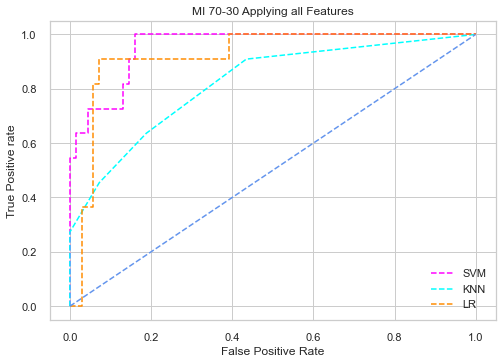

In [47]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sb.set_theme(style = 'whitegrid')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'magenta', label = 'SVM')
plt.plot(fpr7, tpr7, linestyle = '--', color = 'cyan', label = 'KNN')
plt.plot(fpr5, tpr5, linestyle = '--', color = 'darkorange', label = 'LR')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'cornflowerblue')
# title
plt.title('MI 70-30 Applying all Features')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig("ROC/MI 70-30 Applying all Features.png", dpi=300)

plt.show();